In [1]:
import os

In [2]:
# Directory with daisy pictures
daisy_dir = os.path.join('E:\\flowers\\flowers\\daisy')

# Directory with dandelion pictures
dandelion_dir = os.path.join('E:\\flowers\\flowers\\dandelion')

# Directory with rose pictures
rose_dir = os.path.join('E:\\flowers\\flowers\\rose')

# Directory with sunflower pictures
sunflower_dir = os.path.join('E:\\flowers\\flowers\\sunflower')

# Directory with tulip pictures
tulip_dir = os.path.join('E:\\flowers\\flowers\\tulip')

In [3]:
train_daisy_names = os.listdir(daisy_dir)
print(train_daisy_names[:5])

train_rose_names = os.listdir(rose_dir)
print(train_rose_names[:5])

['100080576_f52e8ee070_n.jpg', '10140303196_b88d3d6cec.jpg', '10172379554_b296050f82_n.jpg', '10172567486_2748826a8b.jpg', '10172636503_21bededa75_n.jpg']
['10090824183_d02c613f10_m.jpg', '102501987_3cdb8e5394_n.jpg', '10503217854_e66a804309.jpg', '10894627425_ec76bbc757_n.jpg', '110472418_87b6a3aa98_m.jpg']


In [4]:
print('total daisy images:', len(os.listdir(daisy_dir)))
print('total dandelion images:', len(os.listdir(dandelion_dir)))
print('total rose images:', len(os.listdir(rose_dir)))
print('total sunflower images:', len(os.listdir(sunflower_dir)))
print('total tulip images:', len(os.listdir(tulip_dir)))

total daisy images: 769
total dandelion images: 1055
total rose images: 784
total sunflower images: 734
total tulip images: 984


In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Showing some daisy pictures...



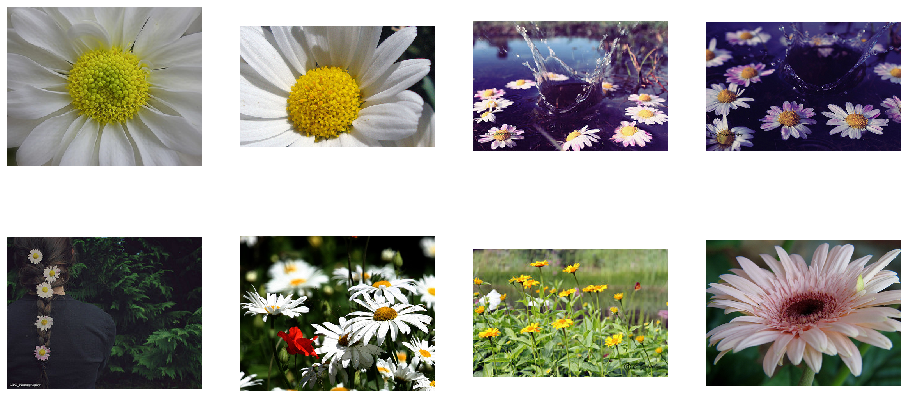

Showing some rose pictures...



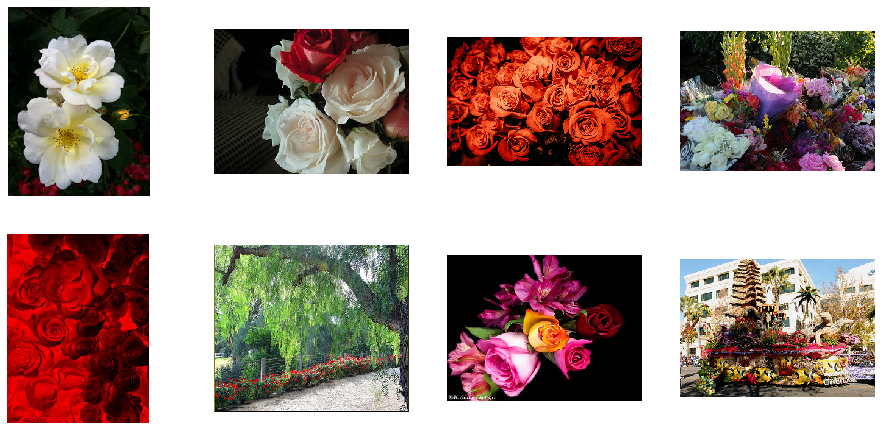

In [6]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_daisy_pix = [os.path.join(daisy_dir, fname) 
                for fname in train_daisy_names[pic_index-8:pic_index]]
next_rose_pix = [os.path.join(rose_dir, fname) 
                for fname in train_rose_names[pic_index-8:pic_index]]

print ("Showing some daisy pictures...")
print()
for i, img_path in enumerate(next_daisy_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

print ("Showing some rose pictures...")
print()
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
for i, img_path in enumerate(next_rose_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [7]:
batch_size = 128

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'E:\\flowers\\flowers',  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 200 x 200
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = ['daisy','dandelion','rose','sunflower','tulip'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

Found 4323 images belonging to 5 classes.


In [9]:
import tensorflow as tf

In [10]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(5, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)        3

In [12]:
import numpy as np

In [13]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [14]:
total_sample=train_generator.n

In [15]:
n_epochs = 30

In [16]:
history = model.fit_generator(
        train_generator, 
        steps_per_epoch=int(total_sample/batch_size),  
        epochs=n_epochs,
        verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
33/33 [==============================] - 280s 8s/step - loss: 1.5286 - acc: 0.3073
Epoch 2/30
33/33 [==============================] - 286s 9s/step - loss: 1.3360 - acc: 0.4358
Epoch 3/30
33/33 [==============================] - 323s 10s/step - loss: 1.1610 - acc: 0.5325
Epoch 4/30
33/33 [==============================] - 375s 11s/step - loss: 1.0511 - acc: 0.5731
Epoch 5/30
33/33 [==============================] - 405s 12s/step - loss: 0.9754 - acc: 0.6155
Epoch 6/30
33/33 [==============================] - 335s 10s/step - loss: 0.9460 - acc: 0.6229
Epoch 7/30
33/33 [==============================] - 387s 12s/step - loss: 0.8955 - acc: 0.6441
Epoch 8/30
33/33 [==============================] - 273s 8s/step - loss: 0.8668 - acc: 0.6620
Epoch 9/30
33/33 [==============================] - 363s 11s/step - loss: 0.8403 - acc: 0.6744
Epoch 10/30
33/33 [==============================] - 333s 10s/step - los

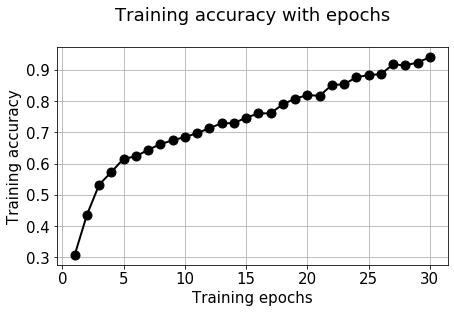

In [17]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['acc'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

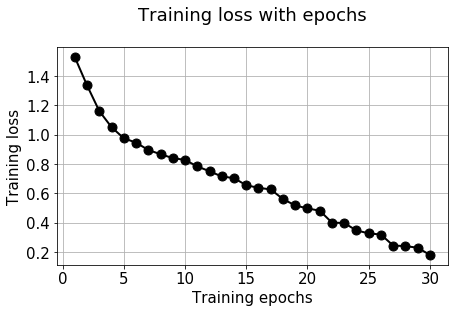

In [18]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['loss'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training loss with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training loss",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [19]:
target_size=(200, 200),
input_shape = tuple(list(target_size)+[3])


In [20]:
def train_CNN(train_directory,target_size=(200,200), classes=None,
              batch_size=128,num_epochs=30,num_classes=5,verbose=1):
    """
    Trains a conv net for the flowers dataset with a 5-class classifiction output
    Also provides suitable arguments for extending it to other similar apps
    
    Arguments:
            train_directory: The directory where the training images are stored in separate folders.
                            These folders should be named as per the classes.
            target_size: Target size for the training images. A tuple e.g. (200,200)
            classes: A Python list with the classes 
            batch_size: Batch size for training
            num_epochs: Number of epochs for training
            num_classes: Number of output classes to consider
            verbose: Verbosity level of the training, passed on to the `fit_generator` method
    Returns:
            A trained conv net model
    
    """
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
    import tensorflow as tf
    from tensorflow.keras.optimizers import RMSprop
    
    # ImageDataGenerator object instance with scaling
    train_datagen = ImageDataGenerator(rescale=1/255)

    # Flow training images in batches using the generator
    train_generator = train_datagen.flow_from_directory(
            train_directory,  # This is the source directory for training images
            target_size=target_size,  # All images will be resized to 200 x 200
            batch_size=batch_size,
            # Specify the classes explicitly
            classes = classes,
            # Since we use categorical_crossentropy loss, we need categorical labels
            class_mode='categorical')
    
    input_shape = tuple(list(target_size)+[3])
    
    # Model architecture
    model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 512 neuron in the fully-connected layer
    tf.keras.layers.Dense(512, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    
    # Optimizer and compilation
    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])
    
    # Total sample count
    total_sample=train_generator.n
    
    
    # Create a callback that saves the model's weights
    cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                     save_weights_only=True,verbose=1)
    
    
    # Training
    model.fit_generator(
        train_generator, 
        steps_per_epoch=int(total_sample/batch_size),  
        epochs=num_epochs,
        verbose=verbose)
    
    return model

In [21]:
from  tensorflow.keras.models import load_model
model.save('RAWAN_CNN_Kears.h5')
flower_classifier.save_weights('my_check1')